In [290]:
using DataFrames
using Gadfly
using Compose
set_default_plot_size(29cm, 10cm)

## naf_apo

In [208]:
# POVME
pov_nafapo_vol = readdlm("naf_apo/povme/output/POVME_output");

# Epock
epo_nafapo_vol = readdlm("naf_apo/epock/volume.dat");

# MDpocket
mdp_nafapo_vol = readdlm("naf_apo/mdpocket/2ndrun/mdpout_descriptors.txt", header=true)[1][:, 1:2]
# For some reason MD pocket gives output for 599 frames, instead of 600
mdp_nafapo_vol = [ mdp_nafapo_vol; [600.0 mdp_nafapo_vol[598, 2] ] ]

# ANA
ana_nafapo_vol = readdlm("naf_apo/ANA_naf_apo_mdvol");

nafapo_vol = DataFrame(Volume = [ pov_nafapo_vol[:, 2]; epo_nafapo_vol[:, 2]; mdp_nafapo_vol[:, 2]; 
    ana_nafapo_vol[:, 2] ],
    Software = repeat(["POVME"; "Epock"; "MDpocket"; "ANA"], inner=[length(ana_nafapo_vol[:, 1])]));

In [263]:
cor_nafapo_ana_pov = cor(ana_nafapo_vol[:,2], pov_nafapo_vol[:,2])
cor_nafapo_ana_epo = cor(ana_nafapo_vol[:,2], epo_nafapo_vol[:,2])
cor_nafapo_ana_mdp = cor(ana_nafapo_vol[:,2], mdp_nafapo_vol[:,2])
[ cor_nafapo_ana_pov cor_nafapo_ana_epo cor_nafapo_ana_mdp ]

1x3 Array{Float64,2}:
 0.771776  0.654981  0.297168

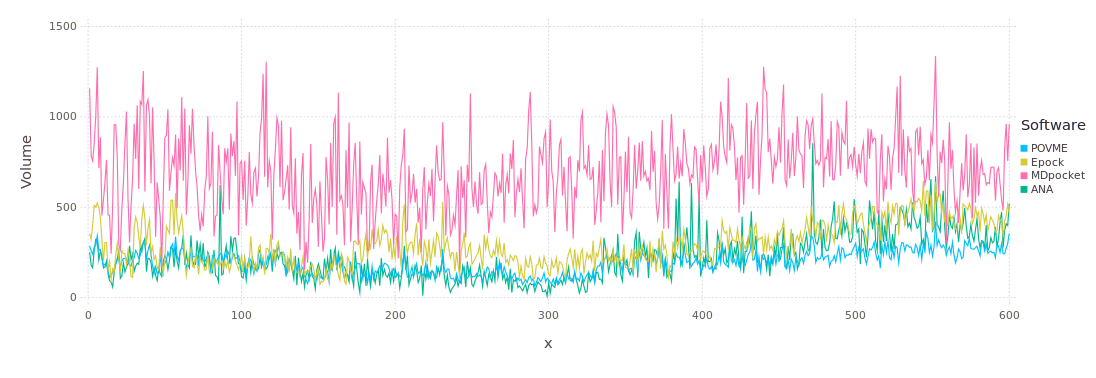

In [210]:
plot(nafapo_vol, Geom.line, x = [ collect(1:600); collect(1:600); collect(1:600); collect(1:600)],
    y = "Volume", color="Software")

### timings

In [312]:
# POVME
pov_nafapo_time = readdlm("naf_apo/povme/parallel_tiempo");
# Epock
epo_nafapo_time = readdlm("naf_apo/epock/tiempo");
# MDpocket
mdp_nafapo_time = readdlm("naf_apo/mdpocket/tiempo")
# ANA
ana_nafapo_time = readdlm("naf_apo/tiempo");
nafapo_time = DataFrame(Duration = [ pov_nafapo_time[1,1]; epo_nafapo_time[1,1]; mdp_nafapo_time[1,1]; ana_nafapo_time[1,1] ],
Software = ["POVME"; "Epock"; "MDpocket"; "ANA"])

,Duration,Software
1,725.2,POVME
2,8.367,Epock
3,564.27,MDpocket
4,14.48,ANA


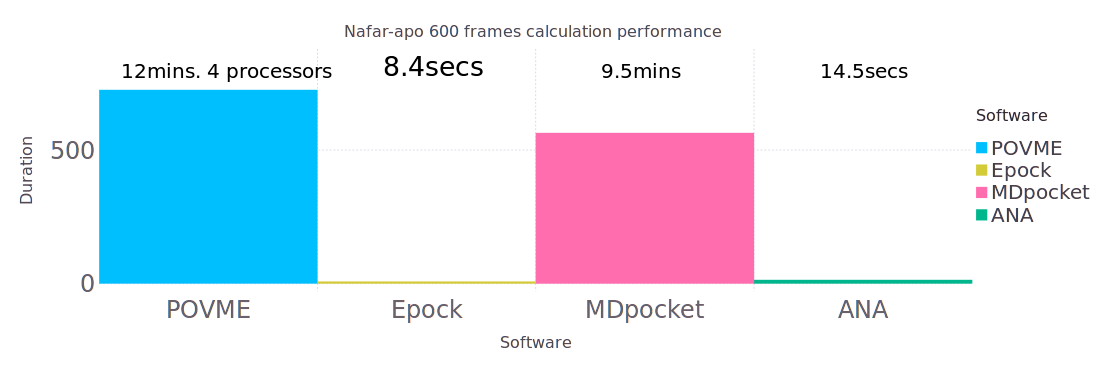

In [332]:
plot(nafapo_time, Geom.bar, x = "Software", y = "Duration", color="Software",
Guide.title("Nafar-apo 600 frames calculation performance "),
Coord.Cartesian(ymax=850),
Guide.annotation(compose(compose(context(), text(0.6, 750, "12mins. 4 processors")), fontsize(15pt), fill("black"))),
Guide.annotation(compose(compose(context(), text(1.8, 750, "8.4secs")), fontsize(20pt), fill("black"))),
Guide.annotation(compose(compose(context(), text(2.8, 750, "9.5mins")), fontsize(15pt), fill("black"))),
Guide.annotation(compose(compose(context(), text(3.8, 750, "14.5secs")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 18pt, major_label_font_size = 12pt,
key_title_font_size=12pt, key_label_font_size=15pt))

## 1prn

In [258]:
# POVME
pov_1prn_vol = readdlm("1prn/povme/parallel_output/POVME_output");

# Epock
epo_1prn_vol = readdlm("1prn/cylepock/volume.dat");

# MDpocket
mdp_1prn_vol = readdlm("1prn/mdpocket/2ndrun/mdpout_descriptors.txt", header=true)[1][:, 1:2]
# For some reason MD pocket gives output for 599 frames, instead of 600
mdp_1prn_vol = [ mdp_1prn_vol; [600.0 mdp_1prn_vol[598, 2] ] ]

# ANA
ana_1prn_vol = readdlm("1prn/ANA_1prn_mdvol");

prn_vol = DataFrame(Volume = [ pov_1prn_vol[:, 2]; epo_1prn_vol[:, 2]; mdp_1prn_vol[:, 2]; 
    ana_1prn_vol[:, 2] ],
        Software = repeat(["POVME"; "Epock"; "MDpocket"; "ANA"], inner=[length(ana_1prn_vol[:, 1])]));

In [259]:
cor_1prn_ana_pov = cor(ana_1prn_vol[:,2], pov_1prn_vol[:,2])
cor_1prn_ana_epo = cor(ana_1prn_vol[:,2], epo_1prn_vol[:,2])
cor_1prn_ana_mdp = cor(ana_1prn_vol[:,2], mdp_1prn_vol[:,2])
[ cor_1prn_ana_pov cor_1prn_ana_epo cor_1prn_ana_mdp ]

1x3 Array{Float64,2}:
 0.199527  0.278204  0.0886933

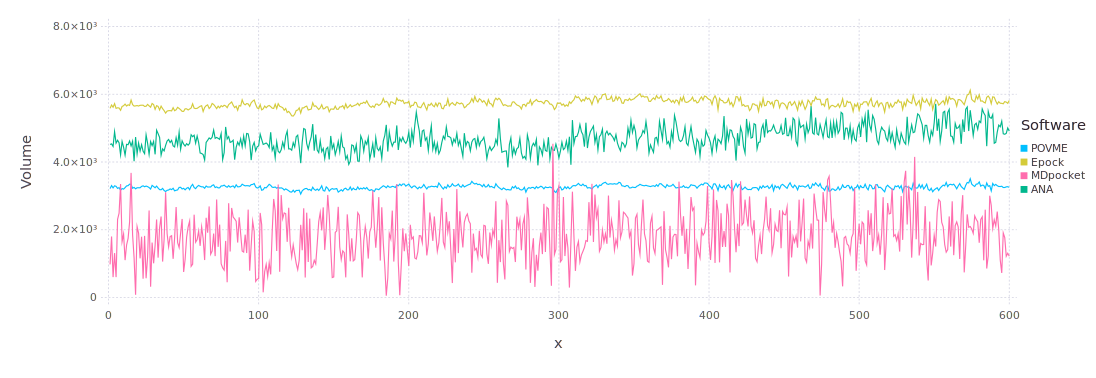

In [261]:
plot(prn_vol, Geom.line, x = [ collect(1:600); collect(1:600); collect(1:600); collect(1:600)],
    y = "Volume", color="Software")

### timings

In [323]:
# POVME
pov_1prn_time = readdlm("1prn/povme/parallel_tiempo");
# Epock
epo_1prn_time = readdlm("1prn/epock/tiempo");
# MDpocket
mdp_1prn_time = readdlm("1prn/mdpocket/tiempo")
# ANA
ana_1prn_time = readdlm("1prn/tiempo");

prn_time = DataFrame(Duration = [ pov_1prn_time[1,1]; epo_1prn_time[1,1]; mdp_1prn_time[1,1]; ana_1prn_time[1,1] ],
Software = ["POVME"; "Epock"; "MDpocket"; "ANA"])

,Duration,Software
1,1620.0,POVME
2,58.367,Epock
3,810.0,MDpocket
4,32.62,ANA


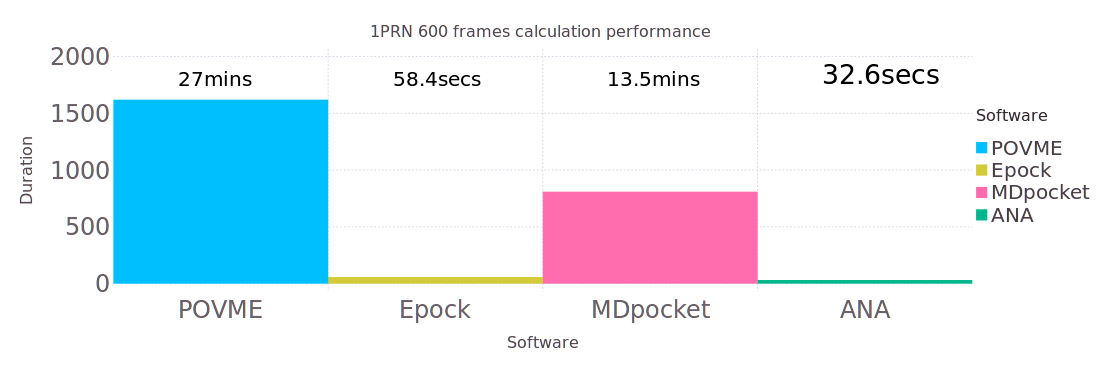

In [333]:
plot(prn_time, Geom.bar, x = "Software", y = "Duration", color="Software",
Guide.title("1PRN 600 frames calculation performance "),
Guide.annotation(compose(compose(context(), text(0.8, 1700, "27mins")), fontsize(15pt), fill("black"))),
Guide.annotation(compose(compose(context(), text(1.8, 1700, "58.4secs")), fontsize(15pt), fill("black"))),
Guide.annotation(compose(compose(context(), text(2.8, 1700, "13.5mins")), fontsize(15pt), fill("black"))),
Guide.annotation(compose(compose(context(), text(3.8, 1700, "32.6secs")), fontsize(20pt), fill("black"))),
Theme(minor_label_font_size = 18pt, major_label_font_size = 12pt,
key_title_font_size=12pt, key_label_font_size=15pt))